In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [5]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADSK', 'AMD', 'AMZN', 'ANET', 'APPH', 
    'AXON', 'BBY','BROS', 'BYND', 'COIN', 'COUR', 'CRWD', 'DDOG', 
    'DKNG', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'EVGO', 'FTCH', 'FUV', 
    'FVRR', 'GH', 'GMED', 'GOOG', 'INTG', 'ISRG', 'JD', 'LSPD', 'LULU',
    'MDB', 'MEDP', 'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR', 'NVDA', 
    'NYT', 'OKTA', 'OPEN', 'PANW', 'PINS', 'PTON', 'QDEL', 'RDFN',
    'RGEN', 'ROKU', 'SE', 'SHOP', 'SOLO', 'SPLK', 'SQ', 'TASK', 'TDOC',
    'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'UPST', 'VEEV', 'WK',
    'XPEV', 'ZEN', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

70

In [6]:
N_YEARS = 5
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = (datetime.now() + timedelta(1)).date()
START = str(TODAY - timedelta(N_DAYS))
START, TODAY

('2017-01-14', datetime.date(2022, 1, 14))

In [7]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  73 of 73 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...ADSK
   ...AMD
   ...AMZN
   ...ANET
   ...APPH
   ...AXON
   ...BBY
   ...BROS
   ...BYND
   ...COIN
   ...COUR
   ...CRWD
   ...DDOG
   ...DKNG
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...EVGO
   ...FTCH
   ...FUV
   ...FVRR
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MEDP
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...NYT
   ...OKTA
   ...OPEN
   ...PANW
   ...PINS
   ...PTON
   ...QDEL
   ...RDFN
   ...RGEN
   ...ROKU
   ...SE
   ...SHOP
   ...SOLO
   ...SPLK
   ...SQ
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...WK
   ...XPEV
   ...ZEN
   ...ZNGA
   ...^GSPC
   ...^IXIC
   ...^NYA


In [8]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.001764
2       0.996391
3       1.003366
4       0.997310
5       1.006565
          ...   
1253    0.999036
1254    0.995950
1255    0.998559
1256    1.009160
1257    1.002818
Name: ^GSPC, Length: 1257, dtype: float64

In [9]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.009512
2,1.007769
3,1.007687
4,1.005646
5,1.014580
...,...
1253,1.015381
1254,0.999939
1255,1.015979
1256,1.041362


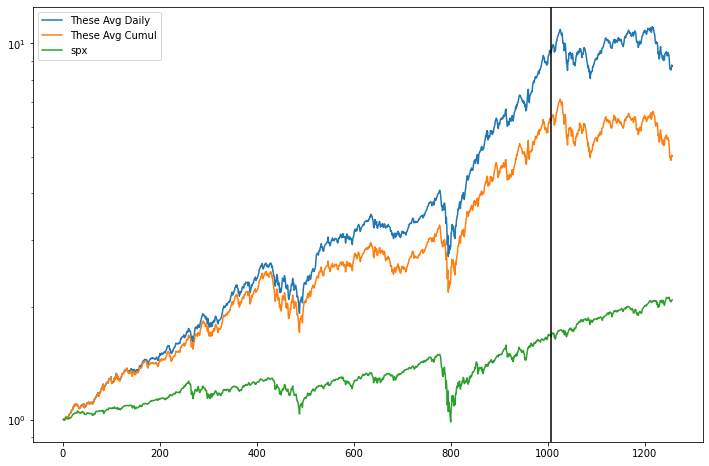

In [10]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
#plt.plot(data['DayToDayChange']
#         .quantile(q=[0.52], axis=1)
#         .T[1:]
#         .cumprod(), 
#         label='52')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

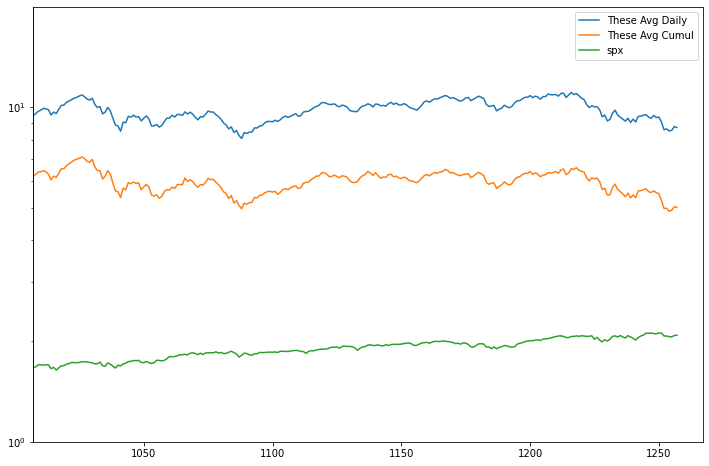

In [11]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
#plt.plot(data['DayToDayChange']
#         .quantile(q=[0.52], axis=1)
#         .T[1:]
#         .cumprod(), 
#         label='52')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim([10 ** 0, 10 ** 1.3])
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [12]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [14]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
193,16.26,16.26,16.990,14.00,16.25,2.788708,1.000615,NaN,NaN
194,15.26,15.26,16.399,15.12,16.10,2.725235,0.947826,0.938499,0.990160
195,15.24,15.24,15.860,14.77,15.40,2.723924,0.989610,0.998689,1.009174
196,13.73,13.73,15.430,13.62,15.10,2.619583,0.909271,0.900919,0.990814
197,14.02,14.02,14.160,13.81,13.82,2.640485,1.014472,1.021122,1.006555


In [15]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
193,16.26,16.26,16.990,14.00
194,15.26,15.26,16.399,15.12
195,15.24,15.24,15.860,14.77
196,13.73,13.73,15.430,13.62
197,14.02,14.02,14.160,13.81


In [16]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
193,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889
194,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890
195,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701
196,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827
197,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308


0.05    0.991191
Name: HighMult, dtype: float64


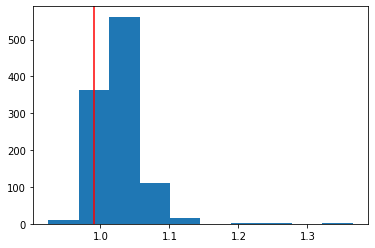

In [17]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0133277156261993


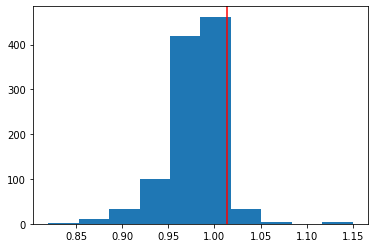

In [18]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [19]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [20]:
get_hilo_mult(rblx)

(1.0133277156261993, 0.991191439643496)

In [21]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0094902711870617, 0.9934616246200441)

In [22]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [23]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
193,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889,0
194,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890,0
195,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701,0
196,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827,0
197,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308,0


In [24]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [25]:
get_hilo_mults(rblx)

(1.0096808508708544,
 0.9922985233790615,
 1.0174351837137696,
 0.9888192784207046)

In [26]:
get_hilo_mults(aapl)

(1.0081160041377606, 0.9963330061958977, 1.010795011456968, 0.9891514076789153)

In [27]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.008116,0.996333,1.010795,0.989151
1,ABMD,1.004615,0.997469,1.006047,0.996859
2,ABNB,1.005371,0.994804,1.010932,0.988588
3,ADSK,1.005086,0.997082,1.008593,0.992697
4,AMD,1.013682,0.993511,1.013860,0.991052


In [28]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv